In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os
import time
from tensorflow.keras.utils import to_categorical

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
num_classes = 10

In [5]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

In [6]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

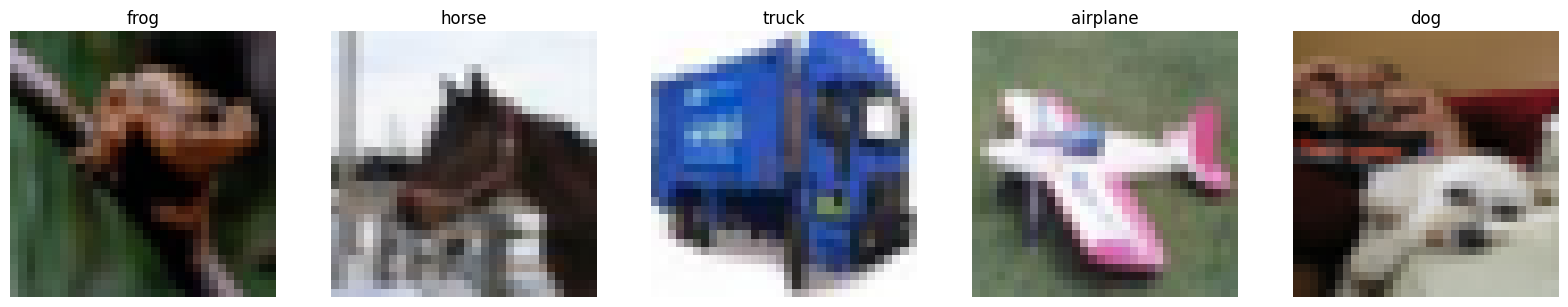

In [7]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [8]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 224x224
    image = tf.image.resize(image, (224,224))
    return image, label

In [9]:
train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=10)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=10)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=10)
                  .batch(batch_size=32, drop_remainder=True))

In [14]:
#The Third version of the Custom model
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16,kernel_size=(3,3), padding="same", activation="relu", input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3), padding="same", activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation="relu"),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(num_classes, activation="softmax")
])

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 batch_normalization_3 (Bat  (None, 224, 224, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_4 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                      

In [16]:
history = model.fit(train_ds,
          epochs=5,
          validation_data=validation_ds,
          validation_freq=1,)

Epoch 1/5
1406/1406 [==============================] - 85s 57ms/step - loss: 2.9084 - accuracy: 0.2935 - val_loss: 1.5072 - val_accuracy: 0.4740
Epoch 2/5
1406/1406 [==============================] - 78s 55ms/step - loss: 1.7386 - accuracy: 0.3845 - val_loss: 1.3505 - val_accuracy: 0.5254
Epoch 3/5
1406/1406 [==============================] - 78s 55ms/step - loss: 1.5886 - accuracy: 0.4399 - val_loss: 1.2661 - val_accuracy: 0.5565
Epoch 4/5
1406/1406 [==============================] - 80s 57ms/step - loss: 1.4575 - accuracy: 0.4836 - val_loss: 1.1787 - val_accuracy: 0.5873
Epoch 5/5
1406/1406 [==============================] - 77s 55ms/step - loss: 1.3482 - accuracy: 0.5252 - val_loss: 1.1324 - val_accuracy: 0.6004


In [17]:
model.evaluate(test_ds)

312/312 [==============================] - 8s 24ms/step - loss: 1.1387 - accuracy: 0.6042


[1.1387320756912231, 0.6041666865348816]

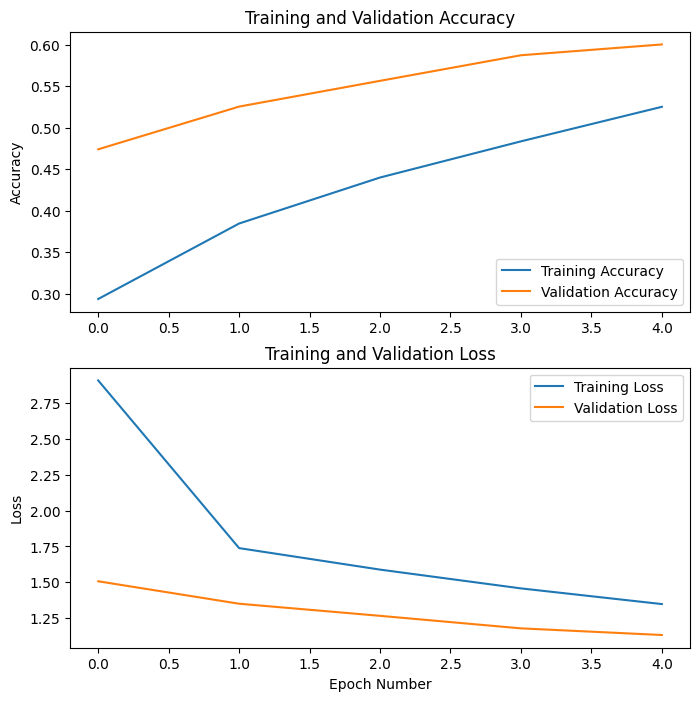

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch Number')
plt.show()